
# Polynomial Regression


generate the data for polynomial regression
    
    





,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


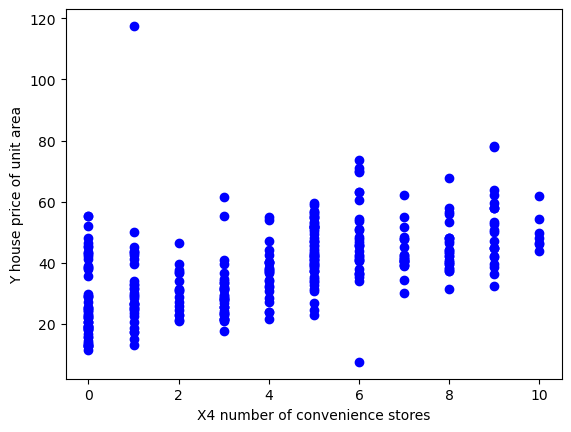

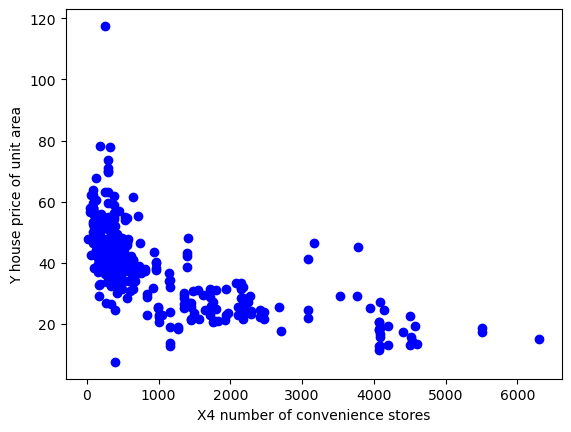

In [17]:
import numpy as np
import pandas as pd
# Load the dataset from the text file
data = pd.read_csv('datasets/real_estate.csv', index_col=False)

display(data.head())

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Y house price of unit area', axis=1), data['Y house price of unit area'], test_size=0.2, random_state=42)

# plot x4 vs y
import matplotlib.pyplot as plt
plt.scatter(X_train['X4 number of convenience stores'], y_train, color='blue')
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')
plt.show()

plt.scatter(X_train['X3 distance to the nearest MRT station'], y_train, color='blue')
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')
plt.show()


**Feature Scaling**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

min-max scaling

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

standardization(standard scores (also called z scores))

$$x_{std} = \frac{x - \mu}{\sigma}$$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean 

**Evaluate model**

Mean Squared Error (MSE)

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$
$$or$$
$$MSE = \frac{1}{2n}\sum_{i=1}^{n}(y_i - f(x_i))^2$$
where 
- $y_i$ is the true value and $\hat{y_i}$ is the predicted value 
- $n$ is the number of observations

Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}$$

R-squared (Coefficient of Determination)

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
$$ SS_{res} = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$
$$ SS_{tot} = \sum_{i=1}^{n}(y_i - \bar{y_i})^2$$

where 
- $SS_{res}$ is the sum of squares of residuals 
- $SS_{tot}$ is the total sum of squares
- $y_i$ is the true value
- $\bar{y_i}$ is the mean of $y_i$
- $\hat{y_i}$ is the predicted value
- $n$ is the number of observations




 0.001362 seconds ---
Mean squared error: 77.34


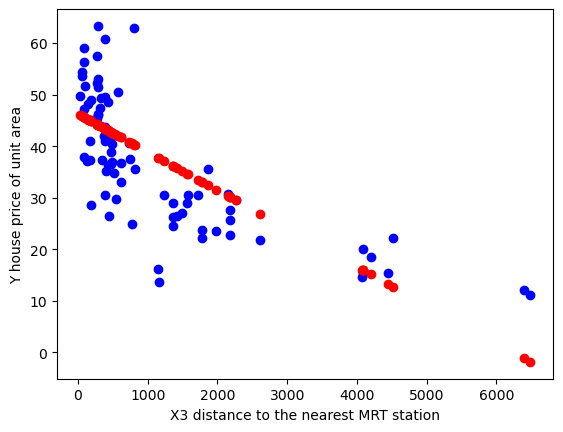

--- 0.000352 seconds ---
Mean squared error: 77.34


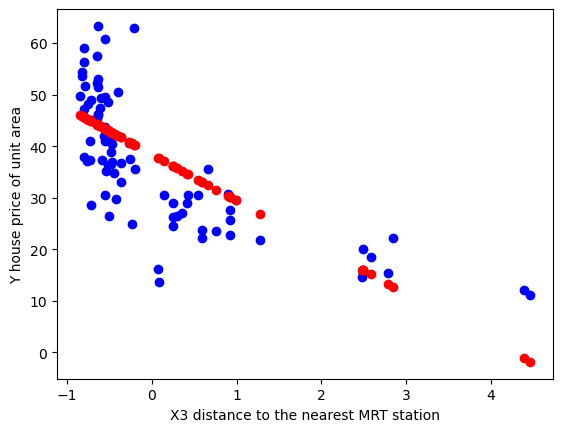

Time difference:  0.00101
How much faster with Scaling features:  3.8693181818181817


In [28]:

# predict y house price of unit area using just x3 distance to the nearest MRT station

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

# Create a linear regression model
model = LinearRegression()

start_time = time.time()
# Train the model
model.fit(X_train[['X3 distance to the nearest MRT station']], y_train)

time_taken_without_scaling = "{:.6f}".format(time.time() - start_time)
print(" %s seconds ---" % (time_taken_without_scaling))

# Make predictions
y_pred = model.predict(X_test[['X3 distance to the nearest MRT station']])

# accuracy
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Plot the predictions on a scatter plot
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_test, color='blue')
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_pred, color='red')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.show()

# by using standard scaler
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train[['X3 distance to the nearest MRT station']])
X_test_scaled = scaler.transform(X_test[['X3 distance to the nearest MRT station']])

# Create a linear regression model
model = LinearRegression()
start_time = time.time()

# Train the model
model.fit(X_train_scaled, y_train)

time_taken_with_scaling = "{:.6f}".format(time.time() - start_time)
print("--- %s seconds ---" % (time_taken_with_scaling))

# Make predictions
y_pred = model.predict(X_test_scaled)

# accuracy
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Plot the predictions on a scatter plot
plt.scatter(X_test_scaled, y_test, color='blue')
plt.scatter(X_test_scaled, y_pred, color='red')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.show()

# time diff 
print("Time difference: ", float(time_taken_without_scaling) - float(time_taken_with_scaling))
# how much faster
print("How much faster with Scaling features: ", float(time_taken_without_scaling) / float(time_taken_with_scaling))



**Adding Polynomial Feature**

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n$th degree polynomial in $x$.Rising the degree of the polynomial, we can get a more complex model.And the model will be more flexible and can fit the data better.

$$y = b + w_1x + w_2x^2 + w_3x^3 + ... + w_dx^d$$

where
- $y$ is the target
- $b$ is the bias
- $w_1$ is the weight of feature $x$

--- 0.001193 seconds ---
Mean squared error: 69.36


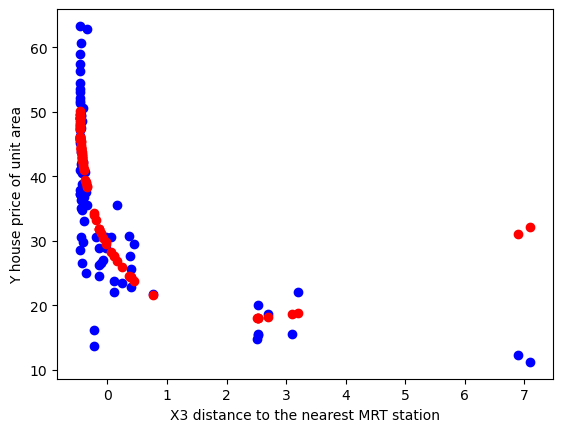

In [36]:
# Import necessary libraries
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initiate polynomial features
poly = PolynomialFeatures(2, include_bias=False)

# Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_train_poly = poly.fit_transform(X_train[['X3 distance to the nearest MRT station']])
X_test_poly = poly.transform(X_test[['X3 distance to the nearest MRT station']])

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Create a linear regression model
model = LinearRegression()
start_time = time.time()

# Train the model
model.fit(X_train_scaled, y_train)

time_taken_with_scaling = "{:.6f}".format(time.time() - start_time)
print("--- %s seconds ---" % (time_taken_with_scaling))

# Make predictions
y_pred = model.predict(X_test_scaled)

# accuracy
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Plot the predictions on a scatter plot
plt.scatter(X_test_scaled[:, 1], y_test, color='blue')  # Use X_test_scaled[:, 1] for the x-axis
plt.scatter(X_test_scaled[:, 1], y_pred, color='red')    # Use X_test_scaled[:, 1] for the x-axis
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.show()


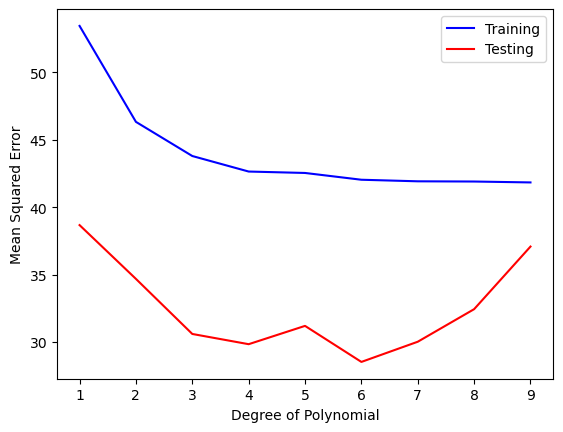

Lowest CV MSE is found in the model with degree= 6 and training error= 42.03789074886363 and testing error= 28.52206160249524


In [50]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize lists to store training and testing errors
training_errors = []
testing_errors = []
maxdegree = 10
# Loop through degrees 1 to 12 and store the training and testing errors
for degree in range(1, maxdegree):
    # Initiate polynomial features
    poly = PolynomialFeatures(degree, include_bias=False)

    # Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
    X_train_poly = poly.fit_transform(X_train[['X3 distance to the nearest MRT station']])
    X_test_poly = poly.transform(X_test[['X3 distance to the nearest MRT station']])

    # Create a scaler object
    scaler = StandardScaler()

    # Fit the scaler to the training data and transform
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate mean squared errors for both training and testing sets
    mse_train = mean_squared_error(y_train, y_train_pred)/2
    mse_test = mean_squared_error(y_test, y_test_pred)/2

    # Append errors to the lists
    training_errors.append(mse_train)
    testing_errors.append(mse_test)

# Plot the training and testing errors against degree
plt.plot(range(1, maxdegree), training_errors, color='blue', label='Training')
plt.plot(range(1, maxdegree), testing_errors, color='red', label='Testing')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

degree = np.argmin(testing_errors) + 1
print(f"Lowest CV MSE is found in the model with degree= {degree} and training error= {training_errors[degree-1]} and testing error= {testing_errors[degree-1]}")


3/3 [==============================] - 0s 711us/step


3/3 [==============================] - 0s 718us/step


3/3 [==============================] - 0s 927us/step


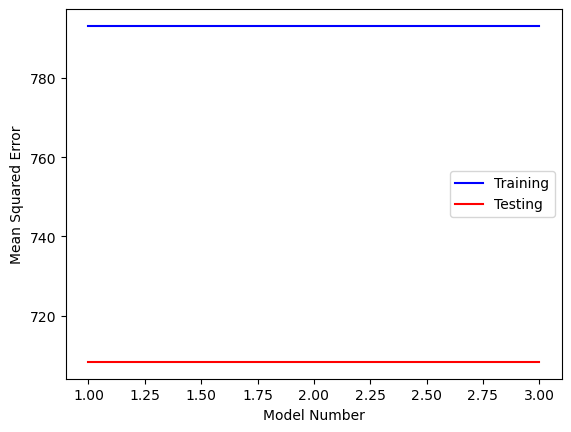

Lowest CV MSE is found in the model number= 1 and training error= 793.1089123867071 and testing error= 708.329156626506


In [53]:
# same process to choose bet diff neural network models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
def build_bc_models():

    tf.random.set_seed(20)

    model_1_bc = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
        ],
        name='model_1_bc'
    )

    model_2_bc = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
        ],
        name='model_2_bc'
    )

    model_3_bc = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
        ],
        name='model_3_bc'
    )

    models_bc = [model_1_bc, model_2_bc, model_3_bc]
    
    return models_bc

models_bc = build_bc_models()

poly = PolynomialFeatures(degree=1, include_bias=False)

# Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_train_poly = poly.fit_transform(X_train[['X3 distance to the nearest MRT station']])
X_test_poly = poly.transform(X_test[['X3 distance to the nearest MRT station']])

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)
# Initialize lists to store training and testing errors
training_errors = []

testing_errors = []

# Loop through models and store the training and testing errors

for model in models_bc:
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate mean squared errors for both training and testing sets
    mse_train = mean_squared_error(y_train, y_train_pred)/2
    mse_test = mean_squared_error(y_test, y_test_pred)/2

    # Append errors to the lists
    training_errors.append(mse_train)
    testing_errors.append(mse_test)

# Plot the training and testing errors against degree
plt.plot(range(1, len(models_bc)+1), training_errors, color='blue', label='Training')
plt.plot(range(1, len(models_bc)+1), testing_errors, color='red', label='Testing')
plt.xlabel('Model Number')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

model_number = np.argmin(testing_errors) + 1
print(f"Lowest CV MSE is found in the model number= {model_number} and training error= {training_errors[model_number-1]} and testing error= {testing_errors[model_number-1]}")




**Diagnose a model via Bias and Variance**

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. A model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. A model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but have high error rates on test data.

level of performance of a model:

human-level performance > training set performance > validation set performance > test set performance


- High bias and low variance: model is underfitting
- Low bias and high variance: model is overfitting
- Low bias and low variance: model is good
- High bias and high variance: model is bad

